In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1**

**Попробуем определить тип популяции опоссумов по их размерам.**

In [3]:
df = pd.read_csv('possum.csv')

**Описание датасета**
*  case: Номер наблюдения
*  site: Номер места, где опоссум был пойман в ловушку.
*  Pop: Население, либо Вик (Виктория), либо другое (Новый Южный Уэльс или Квинсленд).
*  sex: Пол,  m (male) or f (female).
*  age: Возраст.
*  hdlngth: Длинна головы (mm).
*  skullw: Ширина черепа, (mm).
*  totlngth: Общая длина, (cm).
*  taill: Длина хвоста, (cm).
*  footlgth: Длина стопы
*  earconch: Длина ушной раковины
*  eye: Расстояние от медиального кантуса до латерального кантуса правого глаза
*  chest: Обхват груди (cm)
*  belly: Обхват живота (cm)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [6]:
df.isna().sum()

,0
case,0
site,0
Pop,0
sex,0
age,2
hdlngth,0
skullw,0
totlngth,0
taill,0
footlgth,1


In [7]:
df['age'] = df['age'].fillna(df['age'].mean())
df['footlgth'] = df['footlgth'].fillna(df['footlgth'].mean())

In [8]:
category = df[['Pop', 'sex', 'age']]
for column in category:
  unique_values = df[column].unique()
  print(f"Уникальные значения в столбце {column}:\n {unique_values}")

Уникальные значения в столбце Pop:
 ['Vic' 'other']
Уникальные значения в столбце sex:
 ['m' 'f']
Уникальные значения в столбце age:
 [8.         6.         2.         1.         9.         5.
 3.         4.         7.         3.83333333]


In [9]:
df['age'] = df['age'].replace(3.83333333, 3)

In [10]:
df_num_cols = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
describe_df = df[df_num_cols].describe()
print("Базовые статистики для непрерывных данных:\n", describe_df)


Базовые статистики для непрерывных данных:
           hdlngth      skullw    totlngth       taill    footlgth    earconch  \
count  104.000000  104.000000  104.000000  104.000000  104.000000  104.000000   
mean    92.602885   56.883654   87.088462   37.009615   68.459223   48.130769   
std      3.573349    3.113426    4.310549    1.959518    4.373917    4.109380   
min     82.500000   50.000000   75.000000   32.000000   60.300000   40.300000   
25%     90.675000   54.975000   84.000000   35.875000   64.650000   44.800000   
50%     92.800000   56.350000   88.000000   37.000000   68.100000   46.800000   
75%     94.725000   58.100000   90.000000   38.000000   72.500000   52.000000   
max    103.100000   68.600000   96.500000   43.000000   77.900000   56.200000   

              eye       chest       belly  
count  104.000000  104.000000  104.000000  
mean    15.046154   27.000000   32.586538  
std      1.050374    2.045597    2.761949  
min     12.800000   22.000000   25.000000  
25%   

In [11]:
x = df[['age','hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Pop'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis()

In [14]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
lda.predict(X_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, lda.predict(X_test))

1.0

**Задание 2**
**Теперь кластеризируем страны на основании показателей импорта и экспорта.**

In [ ]:
df_2 = pd.read_csv('Country-data.csv')


**Описание датасета:**

*  country: Название страны
*  child_mort: Смертность детей в возрасте до 5 лет на 1000 живорожденных
*  exports: Экспорт товаров и услуг на душу населения. В процентах от ВВП на душу населения
*  health: Общие расходы на здравоохранение на душу населения. В процентах от ВВП на душу населения
*  imports: Импорт товаров и услуг на душу населения. В процентах от ВВП на душу населения
*  income: Чистый доход на душу населения
*  inflation: Измерение годовых темпов роста совокупного ВВП
*  life_expec: Среднее число лет, которое должен прожить новорожденный ребенок, если нынешние модели смертности останутся прежними
*  total_fer: Количество детей, которое будет рождено у каждой женщины, если нынешние коэффициенты рождаемости останутся прежними.
*  gdpp: ВВП на душу населения. Рассчитывается как отношение общего ВВП к общей численности населения.

In [ ]:
df_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df_2.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [ ]:
df_2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


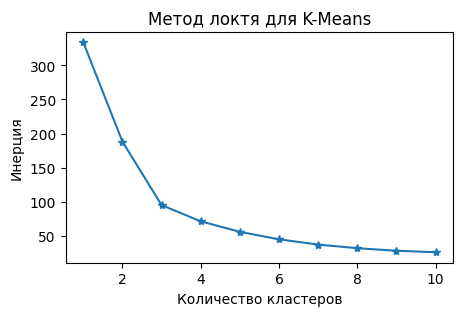

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Выбираем нужные признаки
X = df_2[['exports', 'imports']]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод локтя для определения оптимального числа кластеров
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(5, 3))
plt.plot(K_range, inertia, marker='*', linestyle='-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для K-Means')
plt.show()


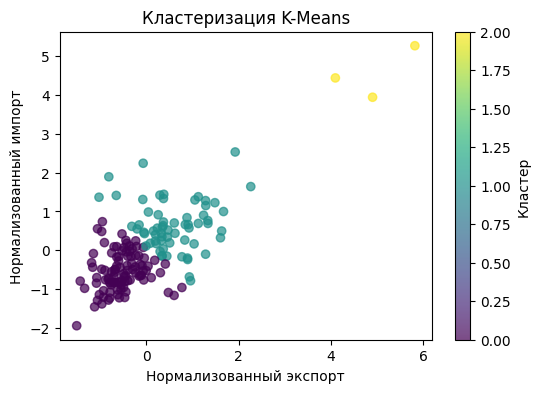

In [ ]:
# Оптимальное количество кластеров (предположим 3, исходя из метода локтя)
optimal_k = 3

# Запускаем K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_2['KMeans_cluster'] = kmeans.fit_predict(X_scaled)

# Визуализация кластеров
plt.figure(figsize=(6, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_2['KMeans_cluster'], alpha=0.7)
plt.xlabel('Нормализованный экспорт')
plt.ylabel('Нормализованный импорт')
plt.title('Кластеризация K-Means')
plt.colorbar(label="Кластер")
plt.show()
